In [385]:
%matplotlib inline

import math
import numpy as np
import numpy.linalg as la
from importlib import reload
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import beta, norm, gamma, kstest, alpha, t, recipinvgauss, ncf, ksone, johnsonsu, maxwell, weibull_min, weibull_max
import pandas as pd
a4_dims = (11.7, 1*8.27)

In [250]:
import src.analysis.tms_entropy as tms
reload(tms)

<module 'src.analysis.tms_entropy' from '/home/garro/Projects/masterarbeit/src/analysis/tms_entropy.py'>

In [324]:
import src.analysis.state_entropy as state_h
reload(state_h)

<module 'src.analysis.state_entropy' from '/home/garro/Projects/masterarbeit/src/analysis/state_entropy.py'>

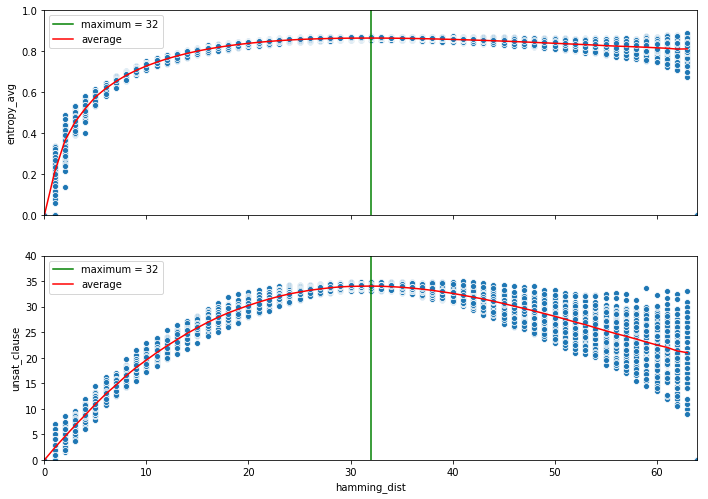

In [331]:
df1 = state_h.get_unsat_clause_avg_to_hamming_dist('probsat_test.db')
df12 = state_h.get_unsat_clause_to_hamming_dist('probsat_test.db')
df2 = state_h.get_state_entropy_avg_to_hamming_dist('probsat_test.db')
df22 = state_h.get_state_entropy_to_hamming_dist('probsat_test.db')
fig, (ax_h, ax_c) = plt.subplots(2, 1, figsize=a4_dims, sharex=True)
ax_h.set_ylim([0,1])
ax_c.set_ylim([0,40])
ax_h.set_xlim([0,64])

_, max_idx_1 = df1.idxmax()
ax_c.axvline(x=max_idx_1, label=f'maximum = {max_idx_1}', color='g')

_, max_idx_2 = df2.idxmax()
ax_h.axvline(x=max_idx_2, label=f'maximum = {max_idx_2}', color='g')

sns.lineplot(x='hamming_dist', y='unsat_clause_avg', data=df1, ax=ax_c, color='r', label='average')
sns.scatterplot(x='hamming_dist',y='unsat_clause', data=df12, ax=ax_c)
sns.lineplot(x='hamming_dist', y='entropy_avg', data=df2, ax=ax_h, color='r', label='average')
sns.scatterplot(x='hamming_dist',y='entropy_avg', data=df22, ax=ax_h)

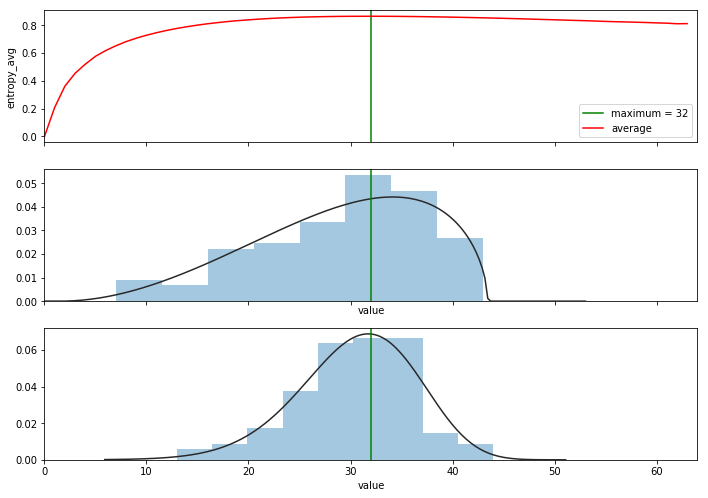

In [364]:
import src.analysis.dynamic_entropy as path_h
reload(path_h)

field='mutual_information'

df0 = path_h.path_entropy_to_performance('probsat_test.db', f'{field}', 'minimum_at', repeat_axis=3)
df1 = path_h.path_entropy_to_performance('probsat_test.db', f'{field}', 'maximum_at', repeat_axis=3)
df2 = state_h.get_state_entropy_avg_to_hamming_dist('probsat_test.db')
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=a4_dims, sharex=True)
sns.distplot(df0['value'], ax=ax1, fit=beta, kde=False)
sns.distplot(df1['value'], ax=ax2, fit=beta, kde=False)
ax0.set_xlim([0,64])

_, max_idx_2 = df2.idxmax()
ax0.axvline(x=max_idx_2, label=f'maximum = {max_idx_2}', color='g')
ax1.axvline(x=max_idx_2, label=f'maximum = {max_idx_2}', color='g')
ax2.axvline(x=max_idx_2, label=f'maximum = {max_idx_2}', color='g')

sns.lineplot(x='hamming_dist', y='entropy_avg', data=df2, ax=ax0, color='r', label='average')

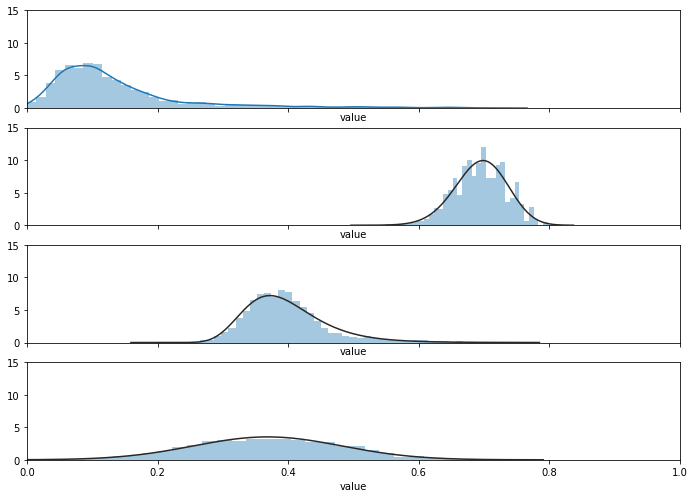

In [394]:
reload(path_h)

field='mutual_information'

df0 = path_h.path_entropy_to_performance('probsat_test.db', f'{field}', 'minimum')
df1 = path_h.path_entropy_to_performance('probsat_test.db', f'{field}', 'maximum')
df2 = path_h.path_entropy_to_performance('probsat_test.db', f'{field}', 'average')
df3 = path_h.path_entropy_to_performance('probsat_test.db', f'{field}', 'latest')

fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, figsize=a4_dims, sharex=True)
ax0.set_xlim([0,1])
ax0.set_ylim([0,15])
ax1.set_ylim([0,15])
ax2.set_ylim([0,15])
ax3.set_ylim([0,15])

sns.distplot(df0['value'], ax=ax0, kde=True, hist=True)
sns.distplot(df1['value'], ax=ax1, fit=beta, kde=False, hist=True)
sns.distplot(df2['value'], ax=ax2, fit=alpha, kde=False, hist=True)
sns.distplot(df3['value'], ax=ax3, fit=norm, kde=False, hist=True)